# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Remicane appear to be more effective at reducing tumor volume compared to Ceftamin and Infubinol. However, Capomulin and Remicane also have data at more timepoints compared to Ceftamin and Infubinol, thus, this relationship could be due to the availability of data across treatment groups.
- For mice on Capomulin, every gram increase in mouse weight was associated with a .95 mm3 increase in tumor volume according to our analysis. This was confirmed using Person's R (r = 0.84).

In [328]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from textwrap import dedent
import scipy.stats as st
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = pd.merge(
    mouse_metadata, 
    study_results, 
    how="left", 
    on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_results


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [306]:
# Checking the number of mice.
mouse_results["Mouse ID"].nunique()

249

In [307]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print(mouse_results.loc[mouse_results.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique())

['g989']


In [308]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicate = mouse_results.loc[mouse_results["Mouse ID"] == 'g989']
mouse_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [309]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_cleaned = mouse_results.loc[mouse_results["Mouse ID"] != 'g989']
mouse_cleaned

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [310]:
# Checking the number of mice in the clean DataFrame.
mouse_cleaned["Mouse ID"].nunique()

248

## Summary Statistics

In [311]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mouse_mean = mouse_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mouse_median = mouse_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
mouse_var = mouse_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
mouse_std = mouse_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
mouse_sem = mouse_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary1 = pd.DataFrame(
    [
        mouse_mean, 
        mouse_median, 
        mouse_var,
        mouse_std,
        mouse_sem
    ], 
    index=['Mean', 'Median', 'Variance', 'Std. dev', 'SEM']
)

summary1


Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Mean,40.675741,52.591172,52.884795,55.235638,54.331565,54.033581,52.320930,40.216745,54.233149,53.236507
Median,41.557809,51.776157,51.820584,53.698743,52.509285,52.288934,50.446266,40.673236,52.431737,51.818479
Variance,24.947764,39.290177,43.128684,68.553577,66.173479,61.168083,43.852013,23.486704,59.450562,48.533355
Std. dev,4.994774,6.268188,6.567243,8.279709,8.134708,7.821003,6.622085,4.846308,7.710419,6.966589
SEM,0.329346,0.469821,0.492236,0.603860,0.596466,0.581331,0.544332,0.320955,0.573111,0.516398


In [312]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary2 = (
    mouse_cleaned
    .groupby("Drug Regimen")["Tumor Volume (mm3)"]
    .agg(
        ['mean', 
        'median', 
        'std',
        'var', 
        'sem']))
summary2

,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Time Points for All Mice Tested')

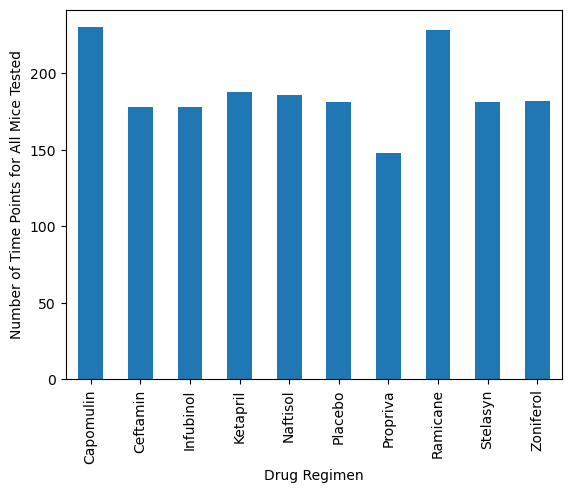

In [313]:
# Generate a bar plot showing the total number of time points for all mice tested for each drug regimen throughout the study using Pandas DataFrame.plot() method.

#Count number of timepoints based on drug regimen and put in new dataframe
mouse_counted = mouse_cleaned.groupby("Drug Regimen")["Timepoint"].count()

#Chart it in a bar graph
bar1 = mouse_counted.plot.bar(x="Drug Regimen", y="Timepoint", rot=90)
bar1.set_ylabel('Number of Time Points for All Mice Tested')



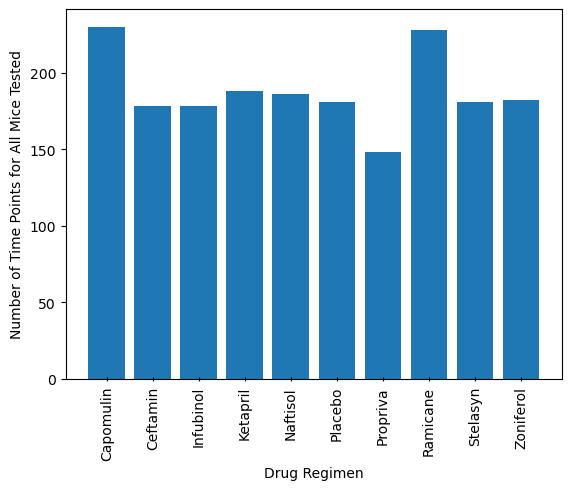

In [314]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
fig2, bar2 = plt.subplots()
x_axis = np.arange(len(mouse_counted.index))
bar2.bar(mouse_counted.index, mouse_counted, align="center")
bar2.set_ylabel('Number of Time Points for All Mice Tested')
bar2.set_xlabel('Drug Regimen')
bar2.tick_params(axis='x',direction='inout',rotation=90)

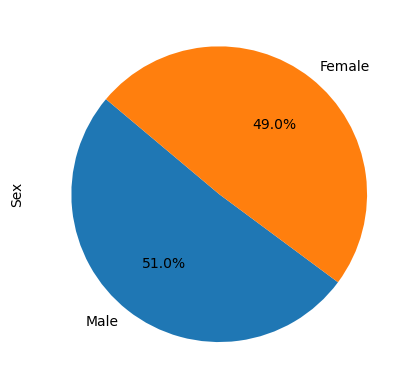

In [315]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#Subset data by mouse sex
mouse_sex = mouse_cleaned["Sex"].value_counts().to_frame()
mouse_sex = pd.DataFrame(mouse_sex)

#Plot it in a pie chart
pandas_plot = mouse_sex.plot.pie(
    y='Sex', 
    autopct="%1.1f%%", 
    legend=None, 
    startangle=140
    )


Text(0, 0.5, 'Sex')

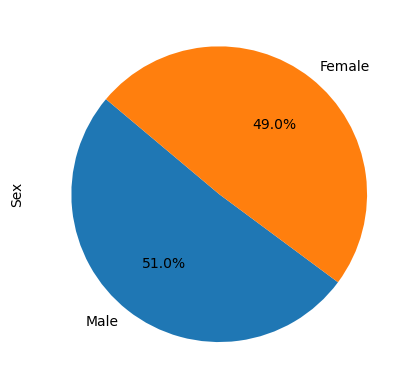

In [316]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_sex["Sex"], labels=mouse_sex.index,
        autopct="%1.1f%%", startangle=140)
plt.ylabel('Sex')


## Quartiles, Outliers and Boxplots

In [317]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_subset = (mouse_cleaned.loc[(
    mouse_cleaned["Drug Regimen"] == "Capomulin") |
    (mouse_cleaned["Drug Regimen"] == "Ramicane") |
    (mouse_cleaned["Drug Regimen"] == "Infubinol") |
    (mouse_cleaned["Drug Regimen"] == "Ceftamin"), :])
mouse_subset

# Start by getting the last (greatest) timepoint for each mouse using groupby()
mouse_max_time = mouse_subset.groupby("Mouse ID")["Timepoint"].max().to_frame()
mouse_max_time

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint (make sure index is reset)
mouse_max_dat = pd.merge(mouse_max_time, mouse_subset, on=("Mouse ID","Timepoint"), how = 'left')
mouse_max_dat

# Alternatively, could have just done this (did above for purposes of assignment):
# mouse_max_dat = mouse_subset.loc[(mouse_subset["Timepoint"] == mouse_subset["Timepoint"].max()),:]


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [318]:
# Put treatments into a list for a for loop (and later for plot labels)
treatments = mouse_max_dat["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

#Use a for loop is used to display the interquartile range (IQR) and the outliers for each treatment group
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = mouse_max_dat.loc[(mouse_max_dat['Drug Regimen'] == treatment), :]
    
    # add subset 
    tumor_list.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = tumor_vol.loc[(tumor_vol["Tumor Volume (mm3)"] < lower_bound) | (tumor_vol["Tumor Volume (mm3)"] > lower_bound),:]

    #Arrange and print summary info on outliers
    message = dedent(
    f'''
    \033[1m\033[4mInformation on {treatment} IQR and Outliers\033[0m\033[0m
    \x1B[3mThe iqr is:\x1B[0m {'%.2f' % iqr}
    Tumor volume values \033[1mbelow\033[0m {'%.2f' % lower_bound} could be outliers.
    Tumor volume values \033[1mabove\033[0m {'%.2f' % upper_bound} could be outliers.
    \x1B[3mPossible outliers include data from the following mice:\x1B[0m 
    {outliers["Mouse ID"].values}
        ''')

    print(message)
    


   Information on Infubinol IQR and Outliers
   The iqr is: 11.48
   Tumor volume values below 36.83 could be outliers.
   Tumor volume values above 82.74 could be outliers.
   Possible outliers include data from the following mice: 
   ['a203' 'a251' 'a577' 'a685' 'c139' 'c326' 'c895' 'e476' 'f345' 'i386'
'k483' 'k804' 'm756' 'n671' 'o809' 'o813' 'q132' 's121' 'v339' 'v719'
'v766' 'w193' 'w584' 'y163' 'z581']


   Information on Ceftamin IQR and Outliers
   The iqr is: 15.58
   Tumor volume values below 25.36 could be outliers.
   Tumor volume values above 87.67 could be outliers.
   Possible outliers include data from the following mice: 
   ['a275' 'b447' 'b487' 'b759' 'f436' 'h531' 'j296' 'k210' 'l471' 'l490'
'l558' 'l661' 'l733' 'o287' 'p438' 'q483' 't573' 'u149' 'u153' 'w151'
'x226' 'x581' 'x822' 'y769' 'y865']


   Information on Ramicane IQR and Outliers
   The iqr is: 9.10
   Tumor volume values below 17.91 could be outliers.
   Tumor volume values above 54.31 could be outlie

Tumor Volume (mm3)    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

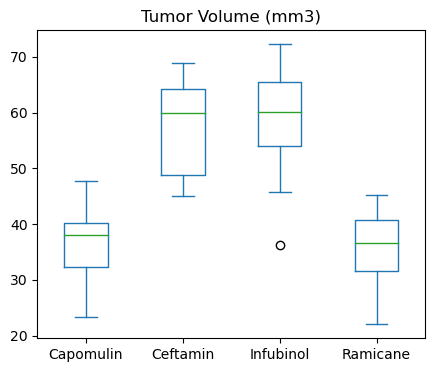

In [319]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

#Combine your list of dataframes generated by the for-loop for each treatment type
tumor_dat = pd.concat(tumor_list)

#Put it in a boxplot
boxplot = tumor_dat.plot.box(
    column="Tumor Volume (mm3)", 
    by="Drug Regimen", 
    figsize=(5, 4))
boxplot


## Line and Scatter Plots

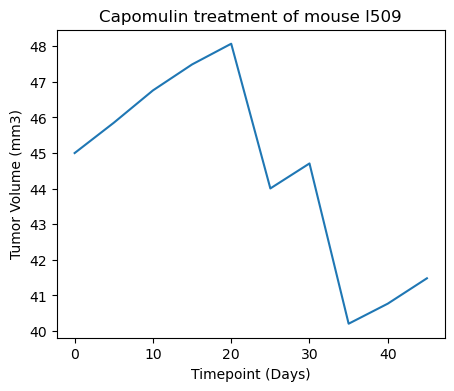

In [320]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Subset of data for one mouse on Capomulin treatment
capomulin_l509 = mouse_subset.loc[(mouse_subset["Mouse ID"] == "l509"),:]

#Plot mouse's data on line graph
capo_line = capomulin_l509.plot.line(
    x="Timepoint", 
    y="Tumor Volume (mm3)", 
    title="Capomulin treatment of mouse l509", 
    legend=False, 
    ylabel="Tumor Volume (mm3)",
    xlabel="Timepoint (Days)",
    figsize=(5, 4)
    )


/Users/tifanibiro/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


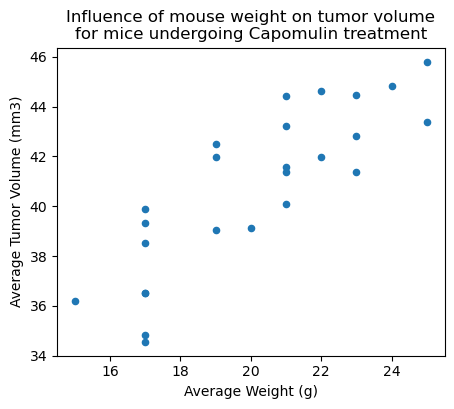

In [321]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Subset data by drug regimen and then get averages of tumor volume and weight
capomulin_dat = (
    mouse_subset
    .loc[(mouse_subset["Drug Regimen"] == "Capomulin"),:]
    .groupby("Mouse ID")[["Tumor Volume (mm3)", "Weight (g)"]]
    .mean()
    )

#Add to scatterplot
capo_scatter = capomulin_dat.plot.scatter(
    x="Weight (g)", 
    y="Tumor Volume (mm3)", 
    title="Influence of mouse weight on tumor volume\nfor mice undergoing Capomulin treatment", 
    legend=False, 
    ylabel="Average Tumor Volume (mm3)",
    xlabel="Average Weight (g)",
    figsize=(5, 4)
    )



## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


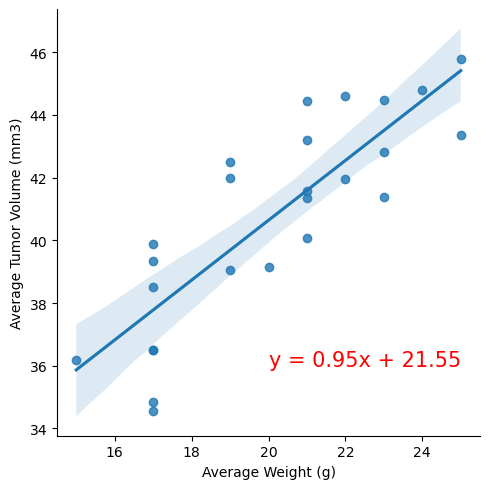

In [336]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

#Made initial regression chart
sns.lmplot(x='Weight (g)',y='Tumor Volume (mm3)',data=capomulin_dat,fit_reg=True) 
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Average Weight (g)')

#Make equation and add it to chart
x_values = capomulin_dat['Weight (g)']
y_values = capomulin_dat['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,36),fontsize=15,color="red")

#Calculate correlation coefficient
correlation_coef = round(st.pearsonr(x_values,y_values)[0],2)

#Print correlation coeficciant
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {correlation_coef}")

#Show plot
plt.show()


